<a href="https://colab.research.google.com/github/DanDas3/RedeNeuralMegaSena/blob/master/Implementando%20uma%20rede%20neural%20com%20dados%20Mega%20Sena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/DanDas3/RedeNeuralMegaSena.git

fatal: destination path 'RedeNeuralMegaSena' already exists and is not an empty directory.


# Importando bibliotecas

In [0]:
import pandas              as pd
import numpy               as np
import matplotlib.pyplot   as plt
import seaborn             as sns
import missingno           as msno
import numpy               as np

%matplotlib inline

pd.set_option('display.max_columns',500)

# Carregando dataset

In [3]:
df             = pd.read_excel('RedeNeuralMegaSena/megasena.xlsx')
df.head()

,Concurso,Data Sorteio,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada
0,1.0,1996-03-11,41.0,5.0,4.0,52.0,30.0,33.0,0.0,0.0,NaN,NaN,0.00,17.0,39158.92,2016.0,330.21,SIM,1714650.23,0.0,0.0
1,2.0,1996-03-18,9.0,39.0,37.0,49.0,43.0,41.0,0.0,1.0,NaN,PR,2307162.23,65.0,14424.02,4488.0,208.91,NÃO,0.00,0.0,0.0
2,3.0,1996-03-25,36.0,30.0,10.0,11.0,29.0,47.0,0.0,2.0,NaN,RN,391192.51,62.0,10515.93,4261.0,153.01,NÃO,0.00,0.0,0.0
3,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,1996-04-01,6.0,59.0,42.0,27.0,1.0,5.0,0.0,0.0,NaN,NaN,0.00,39.0,15322.24,3311.0,180.48,SIM,717080.75,0.0,0.0


# Check dataset

In [4]:
df.shape

(2483, 21)

In [5]:
df.dtypes

Concurso                           float64
Data Sorteio                datetime64[ns]
primeira_dezena                    float64
segunda_dezena                     float64
terceira_dezena                    float64
quarta_dezena                      float64
quinta_dezena                      float64
sexta_dezena                       float64
Arrecadacao_Total                  float64
Ganhadores_Sena                    float64
Cidade                              object
UF                                  object
Rateio_Sena                        float64
Ganhadores_Quina                   float64
Rateio_Quina                       float64
Ganhadores_Quadra                  float64
Rateio_Quadra                      float64
Acumulado                           object
Valor_Acumulado                    float64
Estimativa_Prêmio                  float64
Acumulado_Mega_da_Virada           float64
dtype: object

# Transformando dados

In [0]:
# Vamos criar uma coluna para armazenar a data e converte-la para datetime

df['data_sorteio_conv'] = df.iloc[:,1]
df.data_sorteio_conv = pd.to_datetime(df.data_sorteio_conv)

# Vamos quebrar a data em Dia, Mês e Ano
df['day']   = df.data_sorteio_conv.dt.day
df['month'] = df.data_sorteio_conv.dt.month 
df['year']  = df.data_sorteio_conv.dt.year

In [7]:
# Vamos criar um dataframe para analisar os sorteios que tiveram ganhadores

df_ganhadores = df[df['Acumulado'] == 'NÃO']

df_ganhadores.head()

,Concurso,Data Sorteio,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,Arrecadacao_Total,Ganhadores_Sena,Cidade,UF,Rateio_Sena,Ganhadores_Quina,Rateio_Quina,Ganhadores_Quadra,Rateio_Quadra,Acumulado,Valor_Acumulado,Estimativa_Prêmio,Acumulado_Mega_da_Virada,data_sorteio_conv,day,month,year
1,2.0,1996-03-18,9.0,39.0,37.0,49.0,43.0,41.0,0.0,1.0,NaN,PR,2307162.23,65.0,14424.02,4488.0,208.91,NÃO,0.0,0.0,0.0,1996-03-18,18.0,3.0,1996.0
2,3.0,1996-03-25,36.0,30.0,10.0,11.0,29.0,47.0,0.0,2.0,NaN,RN,391192.51,62.0,10515.93,4261.0,153.01,NÃO,0.0,0.0,0.0,1996-03-25,25.0,3.0,1996.0
11,11.0,1996-05-20,25.0,15.0,58.0,37.0,59.0,38.0,0.0,1.0,NaN,RJ,15591365.07,148.0,12706.05,9442.0,199.16,NÃO,0.0,0.0,0.0,1996-05-20,20.0,5.0,1996.0
17,17.0,1996-07-01,10.0,20.0,6.0,19.0,51.0,13.0,0.0,1.0,NaN,SP,6789869.08,144.0,7628.37,9376.0,117.16,NÃO,0.0,0.0,0.0,1996-07-01,1.0,7.0,1996.0
24,24.0,1996-08-19,1.0,8.0,14.0,28.0,33.0,43.0,0.0,1.0,NaN,NaN,18661679.61,227.0,7897.31,13486.0,132.93,NÃO,0.0,0.0,0.0,1996-08-19,19.0,8.0,1996.0


# Higienizando nosso dataset

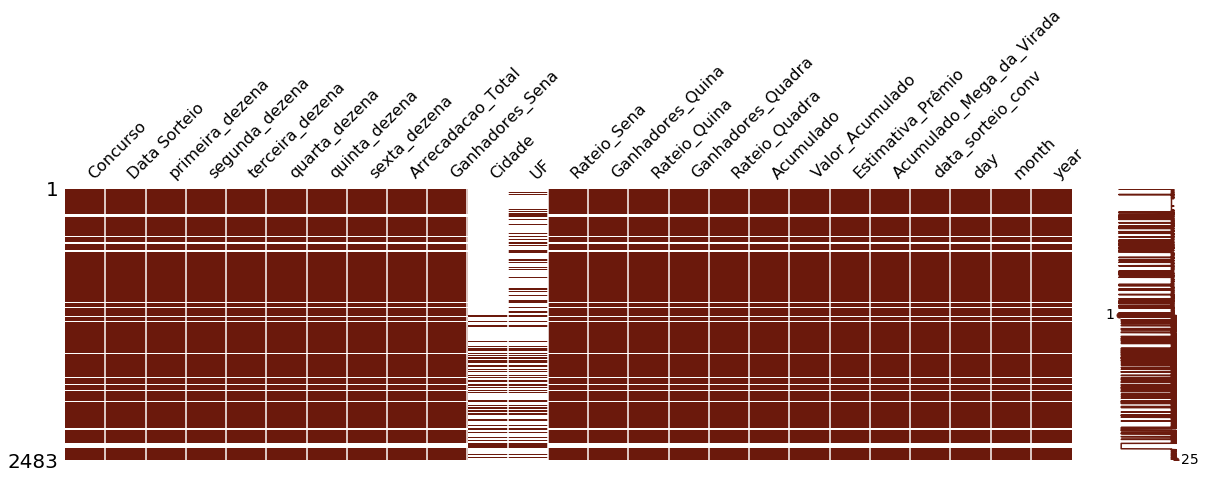

In [8]:
# Visão geral do dataframe
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

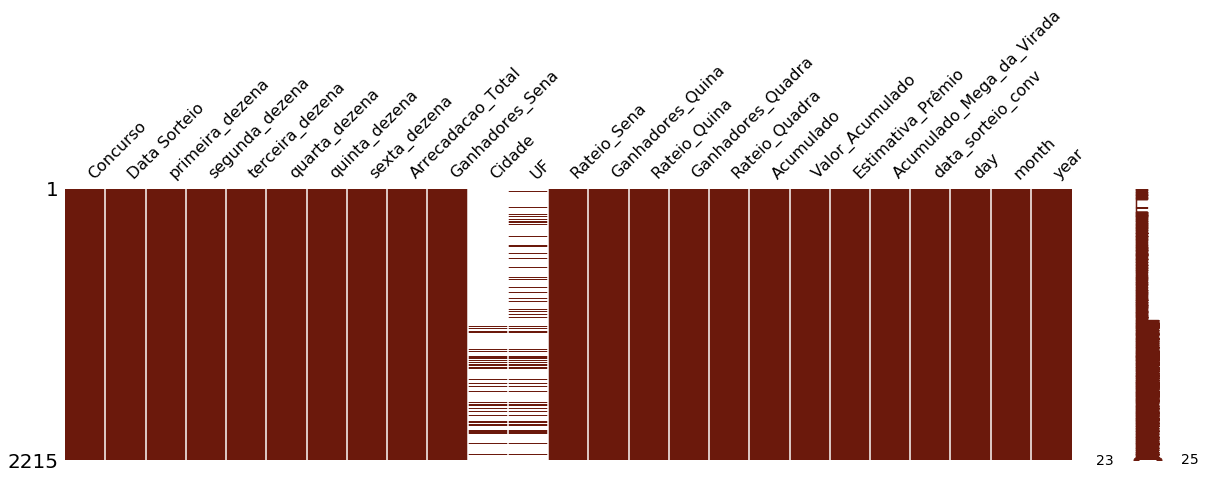

In [9]:
# Removendo valores nulos 
df = df.dropna(subset=['Concurso'])
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

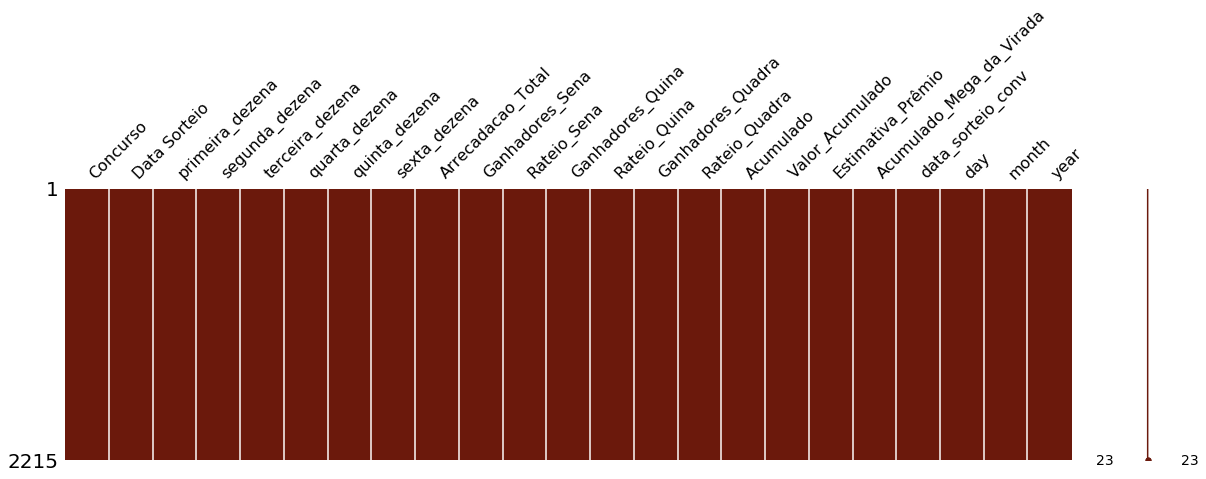

In [10]:
# Removendo colunas Cidade e UF
df = df.drop(['Cidade', 'UF'], axis=1)
msno.matrix(df=df.iloc[:,0:df.shape[1]], figsize=(20, 5), color=(0.42, 0.1, 0.05))

# Exploratory Data Analysis

### Analisando sorteo com ganhadores

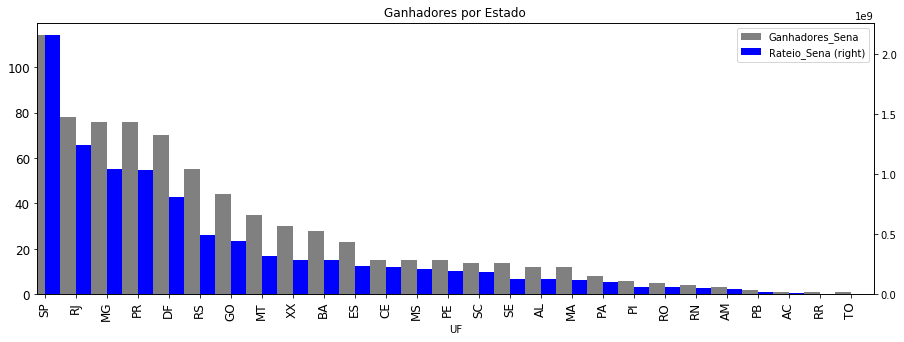

In [11]:
# Ganhadores X Volume do Prêmio por Estado 

ax = df_ganhadores.groupby(['UF'])['Ganhadores_Sena'].agg('sum').sort_values(ascending=False).plot(kind='bar', title='Ganhadores por Estado', figsize=(15,5), fontsize=12, legend=True, position=1, color='gray')

df_ganhadores.groupby(['UF'])['Rateio_Sena'].agg('sum').sort_values(ascending=False).plot(kind='bar', ax=ax, secondary_y=True, legend=True, position=0, color='blue')

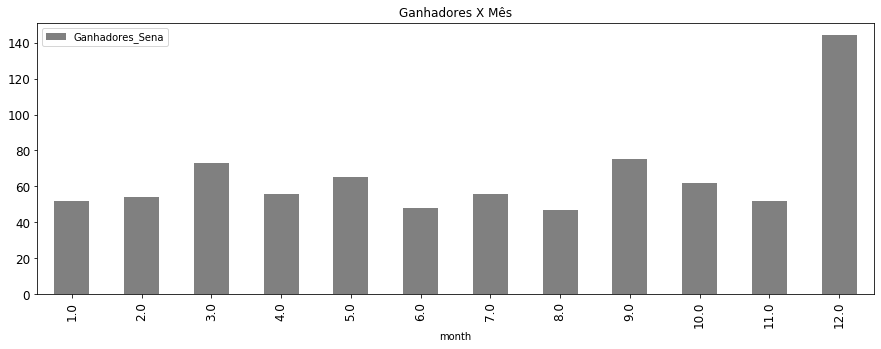

In [12]:
# Ganhadores X Mes

df_ganhadores.groupby(['month'])['Ganhadores_Sena'].agg('sum').plot(kind='bar', title='Ganhadores X Mês', fontsize=12, figsize=(15,5), legend=True, color='gray')

### Analisando dezenas sorteadas

In [13]:
# Verificando se alguma vez as dezenas se repetiram na mesma ordem

df.groupby(['primeira_dezena','segunda_dezena', 'terceira_dezena', 'quarta_dezena', 'quinta_dezena', 'sexta_dezena']).size().sort_values(ascending=False)

# Até agora nunca tivemos um jogo repetido com as dezenas na mesma ordem

primeira_dezena  segunda_dezena  terceira_dezena  quarta_dezena  quinta_dezena  sexta_dezena
60.0             58.0            49.0             32.0           20.0           34.0            1
21.0             11.0            13.0             53.0           54.0           5.0             1
                 23.0            43.0             1.0            19.0           33.0            1
                                 20.0             7.0            29.0           15.0            1
                 19.0            1.0              9.0            34.0           54.0            1
                                                                                               ..
41.0             26.0            51.0             14.0           24.0           23.0            1
                 27.0            13.0             60.0           14.0           18.0            1
                 28.0            45.0             31.0           16.0           59.0            1
                 32.0    

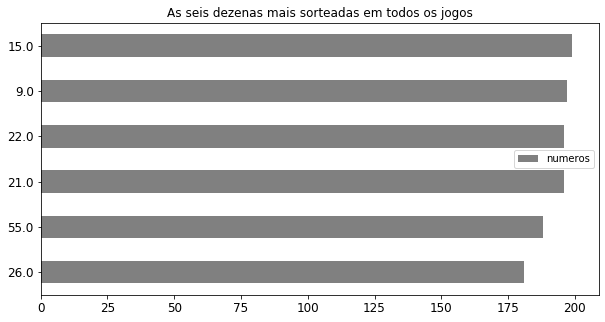

In [14]:
# As seis dezenas mais sorteadas em todos os jogos

dezenas = pd.DataFrame(df['primeira_dezena'].tolist() + df['segunda_dezena'].tolist() + df['terceira_dezena'].tolist() + df['quarta_dezena'].tolist() + df['quinta_dezena'].tolist() + df['sexta_dezena'].tolist(), columns=['numeros'])

dezenas['numeros'].value_counts().sort_values(ascending=True).head(6).plot(kind='barh', title='As seis dezenas mais sorteadas em todos os jogos', figsize=(10,5), fontsize=12, legend=True, color='gray')

# Preparando nosso dataset para o modelo

In [15]:
# Criando dataframe que vamos usar nos modelos 
df_nn = df[['primeira_dezena','segunda_dezena','terceira_dezena','quarta_dezena','quinta_dezena','sexta_dezena', 'Ganhadores_Sena']] 

# Deixando os nomes das coluna em minusculo
df_nn.columns = map(str.lower, df_nn.columns)

df_nn.head(5)

,primeira_dezena,segunda_dezena,terceira_dezena,quarta_dezena,quinta_dezena,sexta_dezena,ganhadores_sena
0,41.0,5.0,4.0,52.0,30.0,33.0,0.0
1,9.0,39.0,37.0,49.0,43.0,41.0,1.0
2,36.0,30.0,10.0,11.0,29.0,47.0,2.0
4,6.0,59.0,42.0,27.0,1.0,5.0,0.0
5,1.0,19.0,46.0,6.0,16.0,2.0,0.0


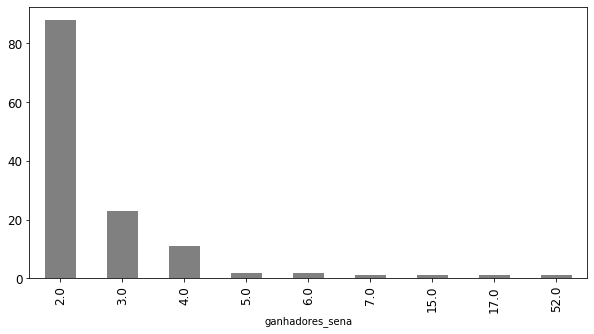

In [16]:
# Pode existir mais de um ganhador por jogo
df_nn[df_nn['ganhadores_sena'] > 1].groupby('ganhadores_sena')['ganhadores_sena'].agg('count').plot(kind='bar',figsize=(10,5), color='gray', fontsize=12)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


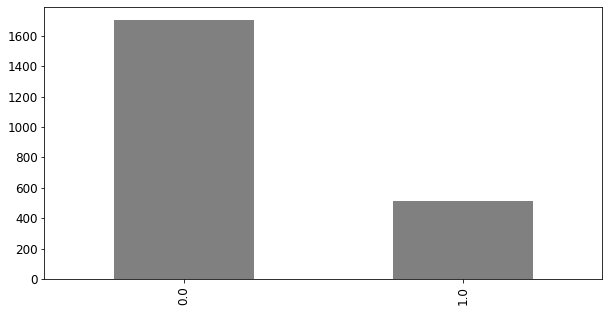

In [17]:
# Então tudo jogo que tiver mais de um ganhador deixamos como o numeor 1
df_nn.loc[df_nn['ganhadores_sena'] > 1, 'ganhadores_sena'] = 1

df_nn['ganhadores_sena'].value_counts().plot(kind='bar', figsize=(10,5), color='gray', fontsize=12)

# First Model - Neural Network

In [18]:
from keras.models  import Sequential
from keras.layers  import Dense
from keras.layers.core import Dropout
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [0]:
# Definição do seed para a reproducidade do modelo
np.random.seed(8)

In [0]:
# Separando target e classes
features = df_nn.iloc[:,0:6]
target   = df_nn.iloc[:,6]

In [0]:
# Dividindo dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(target, features, test_size=0.33, random_state=8)
x_valid = features[:250]
y_valid = target[:250]

In [22]:
# Criando modelo
modelo = Sequential()
modelo.add(Dense(10, input_dim=6, activation='relu'))
modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(512, activation='relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(1, activation='sigmoid'))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [23]:
# Compilando o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
# Preparando para salvar o melhor resultado
from keras.callbacks import ModelCheckpoint 

In [25]:
# Treinando modelo
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)

hist = modelo.fit(y_train, X_train, epochs=300, batch_size=10, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=2, shuffle=True)




Train on 1484 samples, validate on 250 samples
Epoch 1/300





 - 10s - loss: 0.6605 - acc: 0.7358 - val_loss: 0.5155 - val_acc: 0.7880

Epoch 00001: val_loss improved from inf to 0.51547, saving model to model.weights.best.hdf5
Epoch 2/300
 - 1s - loss: 0.5661 - acc: 0.7682 - val_loss: 0.5607 - val_acc: 0.7880

Epoch 00002: val_loss did not improve from 0.51547
Epoch 3/300
 - 1s - loss: 0.5536 - acc: 0.7689 - val_loss: 0.5200 - val_acc: 0.7880

Epoch 00003: val_loss did not improve from 0.51547
Epoch 4/300
 - 1s - loss: 0.5588 - acc: 0.7689 - val_loss: 0.5092 - val_acc: 0.7880

Epoch 00004: val_loss improved from 0.51547 to 0.50916, saving model to model.weights.best.hdf5
Epoch 5/300
 - 1s - loss: 0.5552 - acc: 0.7689 - val_loss: 0.5171 - val_acc: 0.7880

Epoch 00005: val_loss did not improve from 0.50916
Epoch 6/300
 - 1s - loss: 0.5532 - acc: 0.7689 - val_loss: 0.5188 - val_acc: 0.7880

Epoch 00006: val_loss did not improve from 0.50916
Epoch 7/300
 - 1s - loss: 0.5474 - acc: 0.

# Validando Modelo

In [26]:
!ls

model.weights.best.hdf5  RedeNeuralMegaSena  sample_data


In [0]:
# Carrega o melhor resultado
modelo.load_weights('model.weights.best.hdf5')

In [28]:
# Avaliando modelo
scores = modelo.evaluate(y_test, X_test)
print("\n")
print("Acurracia do modelo")
print("\n%s: %2f%%" % (modelo.metrics_names[1], scores[1]*100))

731/731 [==============================] - 0s 48us/step


Acurracia do modelo

acc: 76.744186%


# Predict 

In [29]:
#numero_sorteio = [[3,6,11,27,28,46]]

numero_sorteio = [[7, 14, 47, 54,56, 60]]

y_predict = pd.DataFrame(numero_sorteio)
y_predict

,0,1,2,3,4,5
0,7,14,47,54,56,60


In [30]:
# Fazendo a predição - Classes
predict_class = modelo.predict_classes(y_predict)
print("1 = Tem chance de ganhar / 0 = Não tem chance de ganhar")
print("\n")
print("Previsão Modelo: ",predict_class[0][0])

1 = Tem chance de ganhar / 0 = Não tem chance de ganhar


Previsão Modelo:  0


In [31]:
# Achando a probabilidade - Proba
predict_proba = modelo.predict_proba(y_predict)
print("Qual a probabilidade do número sair?")
print("\n")
print("Probabilidade: ", round((predict_proba[0][0]*100),2), "%")

Qual a probabilidade do número sair?


Probabilidade:  24.33 %


# Gerando numero Mega Sena

In [0]:
import random

In [0]:
random.seed(60)

In [34]:
probabilidade_boa   = 99
probabilidade_atual = 0

# Gerando list com as dezenas sorteadas
dezenas_sorteadas = df_nn[['primeira_dezena','segunda_dezena', 'terceira_dezena', 'quarta_dezena', 'quinta_dezena', 'sexta_dezena']].values.tolist()

# Gera sequencia de numeros até que a probabilidade seja maior ou igual que 99%
while(probabilidade_atual < probabilidade_boa):
    
    # Gera sequencia de número 
    dezenas_megasena = random.sample(range(1, 60), 6)
    
    # Numero gerado já foi sorteado?
    if not dezenas_megasena in dezenas_sorteadas:

        # Valida qual a probabilidade da seguência ser sorteada
        probabilidade_atual = int(modelo.predict_proba(pd.DataFrame([dezenas_megasena]))[0][0]*100)
    

print("Probabilidade de {0} % -> Dezenas: {1}".format(probabilidade_atual, sorted(dezenas_megasena)))   

Probabilidade de 99 % -> Dezenas: [3, 6, 14, 21, 51, 55]


In [0]:
# Salva dados do modelo no pc
from google.colab import files

files.download("model.weights.best.hdf5")